In [1]:
!pip install roboflow

In [2]:
!pip install ultralytics

In [ ]:
!pip install inference_sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.15
    Uninstalling aiohttp-3.11.15:
      Successfully uninstalled aiohttp-3.11.15


In [5]:
input_image = 'p1.jpg'

In [4]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import openai
import json

In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="QheLuA2G6gyN5OgU0f97")
project = rf.workspace("hanna-2lags").project("interior-design-jsxxo-pfzfi")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to interior-design-1 in yolov11:: 100%|██████████| 2012/2012 [00:00<00:00, 9530.27it/s]


In [ ]:
yolo_model = YOLO("yolo11x.pt")

In [ ]:
yolo_model.train(data="interior-design-1/data.yaml", epochs=150, cos_lr=True)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=interior-design-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

train: Scanning /content/interior-design-1/train/labels.cache... 700 images, 38 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 405.8±222.1 MB/s, size: 22.8 KB)


val: Scanning /content/interior-design-1/valid/labels.cache... 200 images, 7 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      31.3G     0.9523       2.65      1.311         65        640: 100%|██████████| 44/44 [00:12<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.45s/it]

                   all        200        692      0.029     0.0467    0.00763    0.00453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      30.7G      1.138      2.256      1.439         82        640: 100%|██████████| 44/44 [00:11<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.06it/s]

                   all        200        692     0.0527      0.148     0.0366     0.0214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      30.8G      1.224       2.23      1.496         64        640: 100%|██████████| 44/44 [00:10<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.68it/s]

                   all        200        692     0.0924      0.194     0.0365     0.0176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      30.7G      1.258      2.173      1.498         91        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]

                   all        200        692     0.0702      0.175     0.0711     0.0424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      30.7G      1.198      2.095      1.465         57        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.69it/s]

                   all        200        692      0.441      0.207      0.179      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      30.7G      1.223        2.1      1.484         83        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.91it/s]

                   all        200        692      0.366      0.275      0.222      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      30.7G      1.148      1.989      1.437         57        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        200        692      0.217      0.375      0.223      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      30.7G      1.077      1.905      1.391         86        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.94it/s]

                   all        200        692      0.245      0.371      0.223      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      30.7G      1.047      1.824      1.371         61        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.12it/s]

                   all        200        692      0.409      0.293      0.267       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      30.7G      1.024       1.79      1.342         76        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.20it/s]

                   all        200        692      0.424      0.336      0.287      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      30.7G      1.008      1.782       1.34         72        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]

                   all        200        692      0.338      0.403      0.312      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      30.7G     0.9678      1.691      1.316         69        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]

                   all        200        692      0.325      0.422      0.335      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      30.7G       0.95      1.707        1.3         67        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.18it/s]

                   all        200        692      0.539      0.397      0.382      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      30.7G      0.978      1.712      1.327         53        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]

                   all        200        692      0.359      0.378      0.318      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      30.7G     0.9552       1.62      1.297         72        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        200        692      0.382      0.459      0.384      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      30.7G     0.9109      1.622      1.275         60        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all        200        692      0.372      0.464      0.374      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      30.7G     0.8981      1.588      1.269         74        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]

                   all        200        692      0.312      0.392       0.32      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      30.7G     0.8516      1.524      1.244         54        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        200        692      0.399       0.43      0.398      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      30.7G     0.8459      1.428      1.238         61        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692      0.526      0.471      0.413      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      30.7G     0.8295       1.44      1.214         72        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all        200        692      0.374      0.474      0.418      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      30.7G     0.8468      1.423      1.219         74        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        200        692      0.508      0.393      0.415      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      30.7G     0.8245      1.383      1.203         85        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        200        692      0.447      0.508      0.443      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      30.7G     0.8354        1.4      1.219         73        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]

                   all        200        692      0.543      0.468      0.442       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      30.7G     0.7945       1.35      1.183         60        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]

                   all        200        692      0.524      0.451      0.441      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      30.7G     0.7984      1.318      1.193         76        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        200        692      0.392      0.555      0.468      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      30.7G     0.7622       1.34      1.176         56        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        200        692      0.406      0.509       0.44      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      30.7G     0.7629      1.275      1.163         81        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all        200        692      0.408      0.506      0.427      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      30.7G     0.7298      1.266      1.155         73        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        200        692      0.417      0.529      0.463      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      30.7G     0.7549      1.294      1.174         63        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        200        692      0.547      0.504      0.459      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      30.7G     0.7349      1.223      1.152         76        640: 100%|██████████| 44/44 [00:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]

                   all        200        692      0.479      0.451      0.472      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      30.7G       0.74      1.249      1.154         78        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.469      0.494      0.458      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      30.7G     0.7248      1.209      1.157         64        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.21it/s]

                   all        200        692      0.456      0.549      0.486      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      30.7G     0.7384      1.252      1.155         59        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        200        692      0.594      0.456      0.476      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      30.7G     0.7297      1.206      1.146         87        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.21it/s]

                   all        200        692      0.447      0.522      0.453      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      30.7G     0.6994      1.142      1.119         71        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        200        692      0.481        0.5      0.473      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      30.7G     0.6909      1.129      1.114         90        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.561      0.511      0.499      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      30.7G     0.6824       1.13      1.117         84        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        200        692      0.528      0.485      0.502      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      30.7G     0.6888      1.105      1.118         73        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        200        692      0.456      0.549      0.507      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      30.7G     0.6552      1.091      1.089         60        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        200        692       0.52      0.504      0.491      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      30.7G     0.6488      1.084      1.088         79        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692      0.447      0.577      0.484      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      30.7G     0.6533      1.103      1.116         60        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        200        692      0.488      0.521      0.514      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      30.7G     0.6316      1.045      1.078         90        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        200        692        0.5      0.537      0.509      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      30.7G     0.6438      1.047      1.092         65        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        200        692      0.489      0.539      0.501      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      30.7G     0.6284      1.037       1.09         53        640: 100%|██████████| 44/44 [00:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all        200        692      0.498      0.617      0.545      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      30.7G     0.6178      1.031      1.088         56        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.551       0.51      0.536      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      30.7G      0.615      1.013      1.065         84        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        200        692       0.53      0.501      0.501      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      30.7G     0.6138     0.9827      1.061         72        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        200        692      0.536      0.564      0.522       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      30.7G     0.5963     0.9564      1.053         54        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.533       0.53      0.542      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      30.7G     0.6015      0.951      1.056         91        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        200        692      0.546      0.505      0.527      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      30.7G     0.6097     0.9904      1.077         91        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692      0.499      0.547      0.517      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      30.7G      0.594     0.9367       1.05        103        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        200        692      0.489      0.612       0.54       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      30.7G     0.5903     0.9228      1.051         87        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        200        692      0.548      0.521      0.551      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      30.7G     0.5716     0.8858      1.043         85        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.504      0.602      0.514      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      30.7G     0.5825      0.901      1.048         74        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.502      0.555      0.535      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      30.7G     0.5716     0.8737      1.041         58        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        200        692       0.52      0.572      0.551       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      30.7G     0.5652     0.8647      1.044         83        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]

                   all        200        692      0.552      0.569      0.557      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      30.7G     0.5519     0.8663      1.033         55        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]

                   all        200        692      0.573      0.564      0.555      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      30.7G     0.5527      0.832      1.035         74        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]

                   all        200        692      0.571      0.512      0.525      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      30.7G     0.5599     0.8517      1.035         44        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]

                   all        200        692      0.483      0.609      0.529      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      30.7G     0.5608     0.8853       1.04         74        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692      0.518      0.553      0.504      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      30.7G     0.5425     0.8116      1.028         79        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        200        692      0.538      0.579      0.563      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      30.7G     0.5271     0.7939      1.009         69        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]

                   all        200        692      0.561      0.584      0.564      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      30.7G     0.5221     0.7939      1.011         65        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        200        692      0.516      0.592      0.545      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      30.7G     0.5091     0.7794      1.003         69        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200        692      0.552      0.534      0.553      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      30.7G     0.5349     0.7957      1.018         73        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all        200        692      0.531      0.572      0.546      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      30.7G     0.5211     0.7731      1.014         70        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        200        692      0.519      0.585      0.555      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      30.7G     0.5151     0.7497      1.001         93        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        200        692      0.592       0.56      0.579      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      30.7G     0.5018     0.7395     0.9903         81        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692      0.579      0.564      0.588      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      30.7G     0.4943     0.7214     0.9976         83        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.526      0.585      0.555      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      30.7G     0.4869     0.7121     0.9884        116        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        200        692      0.589      0.598      0.593      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      30.7G     0.5043     0.7324      1.002         88        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        200        692      0.631      0.574      0.594      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      30.7G     0.4874     0.7462      1.005         39        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        200        692      0.619      0.568      0.591      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      30.7G     0.4879     0.7099      0.994         76        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.25it/s]

                   all        200        692      0.558      0.564       0.56      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      30.7G     0.4957      0.731     0.9966         88        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.532      0.555      0.531      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      30.7G     0.4831     0.6803     0.9895         76        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.589      0.559      0.572      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      30.7G     0.4808     0.7107     0.9879         64        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        200        692      0.571      0.593      0.585      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      30.7G     0.4581     0.6604      0.968         81        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        200        692      0.555      0.584      0.585      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      30.7G     0.4835     0.6673     0.9909         66        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        200        692      0.511      0.621      0.559      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      30.7G     0.4653     0.6698       0.98         83        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        200        692       0.56      0.576      0.578      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      30.7G     0.4596     0.6412     0.9735         67        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        200        692       0.63      0.574      0.592      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      30.7G      0.448     0.6387     0.9673         69        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        200        692      0.567       0.57      0.572      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      30.7G     0.4585     0.6377     0.9789         70        640: 100%|██████████| 44/44 [00:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]

                   all        200        692      0.585      0.581      0.586      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      30.7G     0.4593     0.6245     0.9839         88        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]

                   all        200        692      0.595      0.527      0.557      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      30.7G     0.4377     0.6089     0.9639         61        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]

                   all        200        692      0.553      0.569      0.551      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      30.7G     0.4298      0.616     0.9566         75        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200        692      0.597      0.538      0.569      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      30.7G     0.4246     0.5711     0.9526         83        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        200        692      0.601      0.575      0.585      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      30.7G     0.4166     0.5832     0.9576         81        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        200        692      0.589      0.532      0.554      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      30.7G     0.4319     0.5872     0.9567         67        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        200        692      0.512      0.618      0.571      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      30.7G     0.4272     0.5581     0.9601         73        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        200        692      0.585       0.55       0.56      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      30.7G     0.4152     0.5612     0.9525         81        640: 100%|██████████| 44/44 [00:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.569      0.605      0.587      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      30.7G     0.4125     0.5617     0.9551         88        640: 100%|██████████| 44/44 [00:10<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200        692      0.584      0.575      0.593      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      30.7G     0.4234     0.5821     0.9635         65        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        200        692      0.603      0.601      0.587      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      30.7G     0.4226     0.5644     0.9582         76        640: 100%|██████████| 44/44 [00:10<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]

                   all        200        692      0.567      0.618      0.582      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      30.7G     0.4149     0.5325     0.9457         50        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        200        692      0.643      0.548       0.58      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      30.7G     0.3976     0.5368     0.9501         82        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.33it/s]

                   all        200        692      0.544      0.613      0.579      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      30.7G     0.3913     0.5159     0.9396         81        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        200        692      0.643      0.549      0.574      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      30.7G     0.3882     0.5111     0.9422         64        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        200        692      0.582      0.589      0.594        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      30.7G     0.3911     0.5193     0.9338         91        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        200        692      0.604      0.597      0.605      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      30.7G     0.3751     0.4817     0.9318         83        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        200        692      0.628      0.582      0.607      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      30.7G     0.3804     0.5119     0.9391         67        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.607      0.573      0.576      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      30.7G      0.382     0.4824     0.9284         53        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]

                   all        200        692      0.643      0.523       0.59      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      30.7G     0.3755     0.4861     0.9226         49        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200        692      0.625      0.575      0.594        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      30.7G     0.3744     0.4743     0.9281         72        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        200        692      0.557      0.583      0.566      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      30.7G     0.3697     0.4675     0.9313         52        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.644      0.503      0.564      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      30.7G     0.3734     0.4584     0.9204         61        640: 100%|██████████| 44/44 [00:10<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.555      0.594      0.582      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      30.7G     0.3651     0.4659     0.9216         76        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692       0.59      0.567      0.595      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      30.7G     0.3724     0.4675     0.9318         58        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.636      0.528      0.597      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      30.7G     0.3698     0.4751     0.9218         87        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.24it/s]

                   all        200        692      0.565       0.57       0.59      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      30.7G     0.3489     0.4387     0.9137         80        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        200        692      0.558      0.598      0.581      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      30.7G     0.3469     0.4455     0.9256         65        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200        692      0.583      0.572      0.583      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      30.7G     0.3495     0.4378     0.9147        106        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692      0.574      0.574      0.578      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      30.7G     0.3433     0.4075     0.9101         62        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.43it/s]

                   all        200        692      0.583      0.589      0.595      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      30.7G     0.3432     0.4191     0.9136         69        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        200        692      0.593      0.575      0.589      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      30.7G     0.3393     0.4037     0.9112         68        640: 100%|██████████| 44/44 [00:10<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]

                   all        200        692      0.619      0.568      0.597      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      30.7G     0.3406     0.4372     0.9149         62        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.555      0.617      0.589      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      30.7G     0.3359     0.4137     0.9179         58        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]

                   all        200        692      0.607      0.565      0.577      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      30.7G     0.3447     0.4285     0.9168         53        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.561      0.609      0.591        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      30.7G     0.3339      0.402     0.9066         70        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.592      0.587      0.576      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      30.7G     0.3387     0.4273     0.9136         84        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]

                   all        200        692      0.574      0.589      0.593      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      30.7G      0.334      0.411     0.9093         81        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.27it/s]

                   all        200        692      0.576      0.598      0.592       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      30.7G     0.3211      0.396     0.9051         76        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.26it/s]

                   all        200        692      0.603       0.57       0.58      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      30.7G     0.3213     0.3879     0.9036         73        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        200        692      0.618      0.559      0.583        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      30.7G     0.3279      0.405     0.9078         79        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        200        692      0.601      0.578      0.587      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      30.7G     0.3294     0.3842     0.9124         84        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.614      0.577      0.593       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      30.7G     0.3271      0.373     0.9016        113        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        200        692      0.576      0.603      0.589      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      30.7G     0.3306     0.3954     0.9039         68        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]

                   all        200        692      0.581      0.602      0.583        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      30.7G      0.314      0.371     0.8978         51        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        200        692      0.561       0.62      0.586      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      30.7G     0.3152     0.3738     0.8995         58        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.28it/s]

                   all        200        692      0.586      0.605      0.583      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      30.7G     0.3151     0.3775      0.906         64        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.40it/s]

                   all        200        692      0.565      0.624      0.593      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      30.7G     0.3068     0.3669     0.8963         83        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200        692      0.639      0.554      0.591       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      30.7G      0.319     0.3765     0.9047         73        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.31it/s]

                   all        200        692      0.579      0.609      0.584      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      30.7G      0.308     0.3702     0.8981         60        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.30it/s]

                   all        200        692      0.609      0.588       0.59       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      30.7G      0.304     0.3743     0.8958         71        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692      0.598      0.606      0.586      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      30.7G     0.2997     0.3576     0.8893         82        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.29it/s]

                   all        200        692      0.611      0.597      0.599      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      30.7G     0.3034     0.3665     0.8977         88        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        200        692      0.613      0.597        0.6      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      30.7G     0.3047      0.357     0.8954         63        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.576      0.609      0.603      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      30.7G     0.3053     0.3572     0.9037         83        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]

                   all        200        692      0.613      0.603      0.604      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      30.7G     0.3064     0.3583     0.9018         56        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200        692      0.633      0.583      0.603      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      30.7G     0.3064     0.3644     0.9019         70        640: 100%|██████████| 44/44 [00:10<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]

                   all        200        692      0.626      0.597        0.6      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      30.7G     0.2917     0.3637     0.8877        100        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        200        692      0.611      0.609      0.604      0.517


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      30.7G     0.2588     0.3091      0.854         29        640: 100%|██████████| 44/44 [00:11<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.562      0.613      0.585      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      30.7G     0.2492     0.2653     0.8438         25        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        200        692      0.596      0.562      0.574      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      30.8G     0.2556     0.2774     0.8536         49        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        200        692      0.583       0.58      0.572      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      30.7G     0.2523     0.2524     0.8454         37        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        200        692       0.61       0.55      0.573      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      30.7G     0.2571     0.2527     0.8565         25        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        200        692      0.559      0.605      0.575      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      30.7G     0.2552     0.2702     0.8605         32        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.32it/s]

                   all        200        692      0.563      0.593      0.577      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      30.7G     0.2463     0.2437     0.8447         52        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        200        692      0.558        0.6      0.581        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      30.7G     0.2399     0.2414     0.8429         30        640: 100%|██████████| 44/44 [00:10<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.37it/s]

                   all        200        692      0.563      0.591      0.581      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      30.7G     0.2435     0.2446     0.8494         30        640: 100%|██████████| 44/44 [00:10<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.24it/s]

                   all        200        692      0.563      0.598      0.581      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      30.7G     0.2391     0.2296     0.8556         34        640: 100%|██████████| 44/44 [00:10<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.35it/s]

                   all        200        692      0.603      0.552      0.578      0.498



150 epochs completed in 0.600 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 114.4MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,838,574 parameters, 0 gradients, 194.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


                   all        200        692      0.613      0.603      0.604      0.519
                   bed         27         27      0.448      0.778      0.611      0.498
                 chair         28         38      0.718      0.468      0.532      0.443
            chandelier         75         75      0.562      0.573      0.556      0.475
                 couch         35         35       0.54      0.486      0.546      0.422
              curtains        117        141      0.604      0.624      0.635      0.557
                 frame        101        151      0.825      0.841      0.876      0.825
                pillow         62        162      0.737      0.639       0.71      0.608
                 table         63         63       0.47      0.413      0.364      0.322
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b44c729bb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [ ]:
yolo_model.val(save=True, plots=True)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 190 layers, 56,838,574 parameters, 0 gradients, 194.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1075.9±398.1 MB/s, size: 28.9 KB)


val: Scanning /content/interior-design-1/valid/labels.cache... 200 images, 7 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.04it/s]


                   all        200        692      0.613      0.602      0.603      0.519
                   bed         27         27      0.452      0.778      0.606      0.493
                 chair         28         38      0.717      0.468      0.532      0.442
            chandelier         75         75      0.563      0.573      0.557      0.474
                 couch         35         35      0.541      0.486      0.546      0.422
              curtains        117        141      0.601      0.624      0.635      0.557
                 frame        101        151      0.824      0.839      0.876      0.827
                pillow         62        162      0.736      0.637      0.712      0.613
                 table         63         63       0.47      0.413      0.364      0.322
Speed: 0.8ms preprocess, 4.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train42


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b44c4609d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [6]:
tuned_model = YOLO("best.pt")

In [7]:
results = tuned_model.predict(input_image, conf=0.1, show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/p1.jpg: 288x640 1 couch, 3 pillows, 74.1ms
Speed: 5.5ms preprocess, 74.1ms inference, 144.5ms postprocess per image at shape (1, 3, 288, 640)


In [8]:
from PIL import Image
boxes = results[0].boxes.xyxy.cpu().numpy()

# Crop boxes and run CLIP
image = Image.open(input_image).convert("RGB")

In [9]:
def show_box(box, ax, color='red'):
    x0, y0, x1, y1 = box  # correct interpretation
    w = x1 - x0
    h = y1 - y0
    rect = plt.Rectangle((x0, y0), w, h, linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)

def visualize_segmented_images(image, results):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)

    for r in results[0].boxes.data.cpu().numpy():
        show_box(r[:-2], ax)

    ax.axis('off')
    plt.tight_layout()
    plt.show()

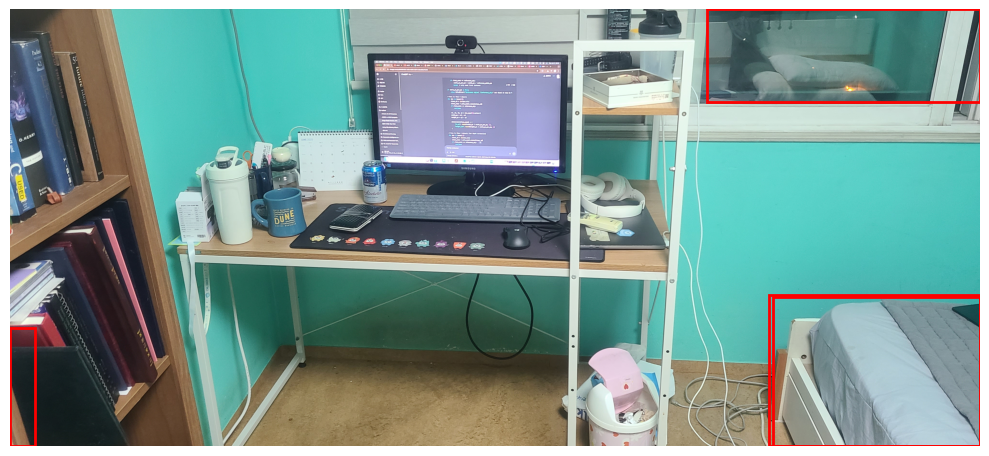

In [10]:
visualize_segmented_images(image, results)

In [11]:
results[0].boxes[0]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([8.], device='cuda:0')
conf: tensor([0.6084], device='cuda:0')
data: tensor([[2.8970e+03, 3.3367e-01, 4.0313e+03, 3.8482e+02, 6.0836e-01, 8.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1816, 4032)
shape: torch.Size([1, 6])
xywh: tensor([[3464.1509,  192.5769, 1134.2412,  384.4864]], device='cuda:0')
xywhn: tensor([[0.8592, 0.1060, 0.2813, 0.2117]], device='cuda:0')
xyxy: tensor([[2.8970e+03, 3.3367e-01, 4.0313e+03, 3.8482e+02]], device='cuda:0')
xyxyn: tensor([[7.1851e-01, 1.8374e-04, 9.9982e-01, 2.1191e-01]], device='cuda:0')